In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\dvale\Desktop\all_data.csv')

In [99]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [101]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [102]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [70]:
#Sorting countries based on their life expectancy value in the first year of the time series.
#Having a sorted list will help us later on when trying to sort the legend of our graphs.

#Original list
countries = list(df.Country.unique())
#Sorted list
sorted_countries = []
#One loop per element on the list
for i in range(df.Country.nunique()):
    #Defining empty objects to store the values we will be updating and ckecking against
    life_expectancy = 0
    higher_country = ''
    #Defining the loops
    for country in countries:
        value_to_check = df[df.Country == country]['Life expectancy at birth (years)'].reset_index(drop=True)[0]
        if value_to_check > life_expectancy:
            life_expectancy = value_to_check
            higher_country = country
    #Appending the sorted value into the new list and removing it form the old list
    sorted_countries.append(higher_country)
    countries.remove(higher_country)
sorted_countries

['Germany', 'Chile', 'United States of America', 'Mexico', 'China', 'Zimbabwe']

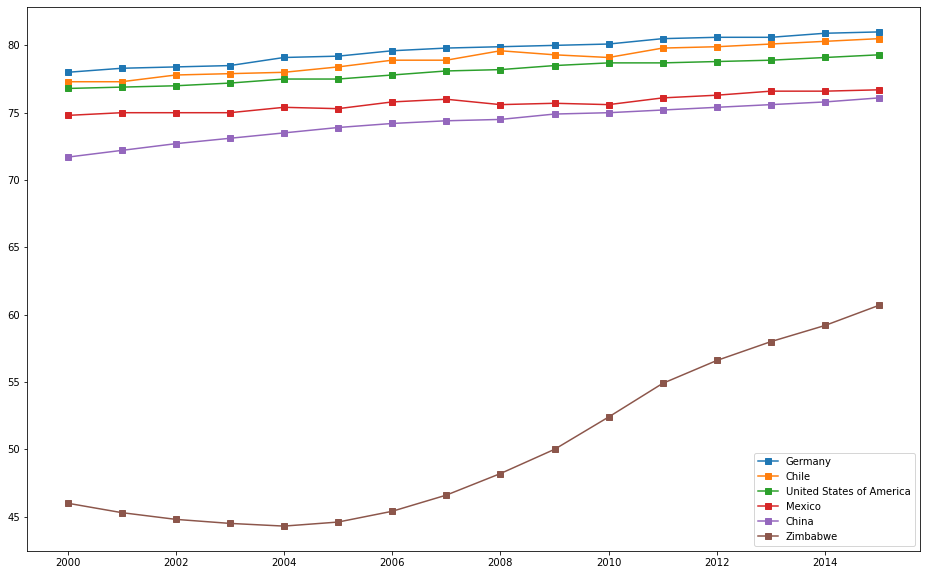

In [94]:
plt.figure(figsize=(16, 10))
ax = plt.subplot()
for i in range(df.Country.nunique()):
    x = df[df.Country == sorted_countries[i]].Year
    y = df[df.Country == sorted_countries[i]]['Life expectancy at birth (years)']
    ax.plot(x, y, label=sorted_countries[i], marker='s')
    #Sorting the legend by life expectancy in the first year of the time series makes the overall graph more readable.
    ax.legend(sorted_countries);